In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow import keras
df = pd.read_csv("/content/drive/MyDrive/2024-deeplearning/data/diabetes.csv",)

In [2]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
X=df.drop('Outcome',axis=1)

In [4]:
X=df.drop('BMI',axis=1)
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,0.627,50,1
1,1,85,66,29,0,0.351,31,0
2,8,183,64,0,0,0.672,32,1
3,1,89,66,23,94,0.167,21,0
4,0,137,40,35,168,2.288,33,1


In [5]:
y=df['BMI']
y.value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

In [6]:
Y = pd.get_dummies(y).values

In [7]:
X = X.values

In [8]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [9]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(8,),activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(30,activation='tanh'))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1303 (5.09 KB)
Trainable params: 1303 (5.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 3s 15ms/step - loss: 0.0137 - mse: 0.0137 - val_loss: 0.0053 - val_mse: 0.0053
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0055 - mse: 0.0055 - val_loss: 0.0075 - val_mse: 0.0075
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0050 - val_mse: 0.0050
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0045 - val_mse: 0.0045
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0057 - val_mse: 0.0057
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0071 - val_mse: 0.0071
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.0052 - mse: 0.0

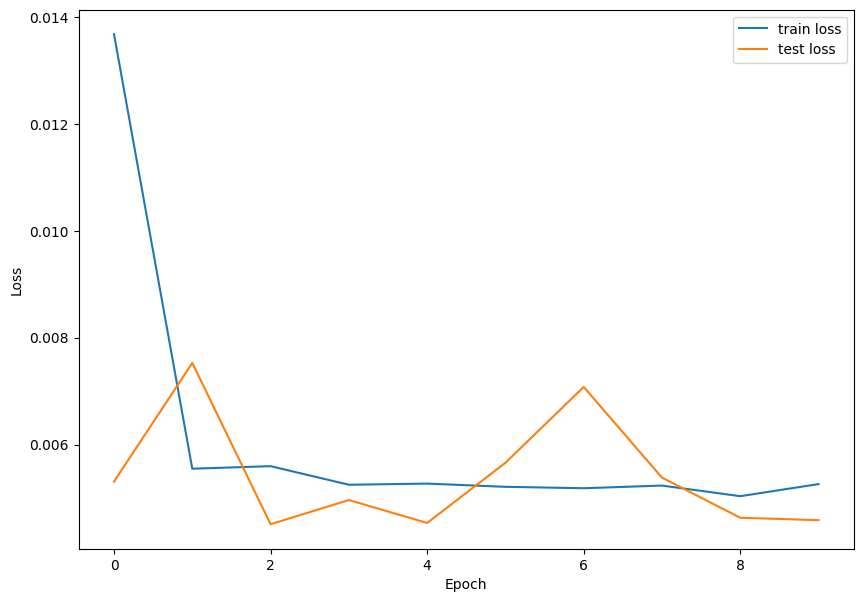

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 5ms/step - loss: 0.0046 - mse: 0.0046


[0.004584562964737415, 0.004584562964737415]